In [80]:
import os

path = "C:/Users/techw/projects.me/recommender/"
os.chdir(path)

In [81]:
os.getcwd()

'C:\\Users\\techw\\projects.me\\recommender'

In [83]:
import pandas as pd
movies = pd.read_csv("data/1m/movies.dat", encoding="latin-1", sep="::")
ratings = pd.read_csv("data/1m/ratings.dat", encoding="latin-1", sep="::")

C:\Users\techw\AppData\Local\Temp\ipykernel_22656\3109250259.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("data/1m/movies.dat", encoding="latin-1", sep="::")
C:\Users\techw\AppData\Local\Temp\ipykernel_22656\3109250259.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("data/1m/ratings.dat", encoding="latin-1", sep="::")


In [84]:
movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [85]:
ratings.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [88]:
movies_df = pd.read_csv(
    "data/1m/movies.dat",
    sep = "::", 
    engine = "python",
    encoding = "latin-1",
    names = ["movie_id", "title", "genres"]
)

In [89]:
ratings_df = pd.read_csv(
    "data/1m/ratings.dat",
    sep = "::", 
    engine = "python",
    encoding = "latin-1",
    names = ["user_id", "movie_id", "rating", "timestamp"]
)

In [90]:
movies_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [91]:
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [92]:
movies = movies_df.copy()
ratings = ratings_df.copy()

In [93]:
movies["genres"] = movies["genres"].str.split("|")
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [94]:
print(movies.isnull().sum())
print(ratings.isnull().sum())

movie_id    0
title       0
genres      0
dtype: int64
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


In [95]:
print("Number of ratings:", len(ratings))
print("Number of unique users:", ratings['user_id'].nunique())
print("Number of unique movies:", ratings['movie_id'].nunique())

Number of ratings: 1000209
Number of unique users: 6040
Number of unique movies: 3706


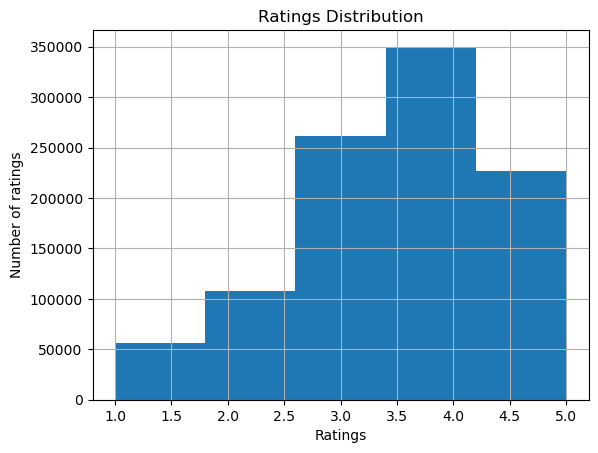

In [96]:
#Ratings Distribution
import matplotlib.pyplot as plt
ratings["rating"].hist(bins=5)
plt.xlabel("Ratings")
plt.ylabel("Number of ratings")
plt.title("Ratings Distribution")
plt.show()

In [97]:
all_genres = sorted(set(g for sublist in movies["genres"] for g in sublist))
print("All genres:", all_genres)

All genres: ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [98]:
for genre in all_genres:
    movies[genre] = movies["genres"].apply(lambda x: int(genre in x))
movies.head()

,movie_id,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

genre_features = movies[all_genres]
genre_similarity = cosine_similarity(genre_features)
print("Genre similarity shape:", genre_similarity.shape)

Genre similarity shape: (3883, 3883)


In [100]:
print(movies['title'].head(10))

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
5                           Heat (1995)
6                        Sabrina (1995)
7                   Tom and Huck (1995)
8                   Sudden Death (1995)
9                      GoldenEye (1995)
Name: title, dtype: object


In [101]:
def recommend(title, top_n=10):
    title = title.strip().lower()

    matching = movies[movies['title'].str.lower().str.contains(title)]
    if matching.empty:
        return f"No movie found containing title: '{title}'"

    idx = matching.index[0]

    sim_scores = list(enumerate(genre_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return movies.iloc[movie_indices][['movie_id', 'title', 'genres']]


In [102]:
print(recommend("mulan", top_n=5))

     movie_id                      title                   genres
241       244    Gumby: The Movie (1995)  [Animation, Children's]
310       313  Swan Princess, The (1994)  [Animation, Children's]
592       596           Pinocchio (1940)  [Animation, Children's]
612       616     Aristocats, The (1970)  [Animation, Children's]
700       709    Oliver & Company (1988)  [Animation, Children's]


In [103]:
# Compute average ratings and rating counts
movie_stats = ratings.groupby('movie_id').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats = movie_stats.reset_index()

# Merge with movies
movies_with_ratings = pd.merge(movies, movie_stats, left_on='movie_id', right_on='movie_id')

In [105]:
def hybrid_recommend(title, top_n=10, min_rating_count=50, weight_genre=0.5, weight_rating=0.5):
    match = movies_with_ratings[movies_with_ratings['title'].str.contains(title, case=False, na=False)]
    if match.empty:
        return f"No movie found with title: '{title}'"
    
    idx = match.index[0]
    
    genre_scores = list(enumerate(genre_similarity[idx]))
    
    sim_df = pd.DataFrame(genre_scores, columns=['index', 'genre_sim'])
    sim_df = sim_df.merge(movies_with_ratings, left_on='index', right_index=True)
    
    sim_df = sim_df[sim_df['rating_count'] >= min_rating_count]
    sim_df['norm_rating'] = sim_df['avg_rating'] / 5  # normalize to [0,1]
    sim_df['hybrid_score'] = (weight_genre * sim_df['genre_sim']) + (weight_rating * sim_df['norm_rating'])

    sim_df = sim_df.sort_values(by='hybrid_score', ascending=False)

    sim_df = sim_df[sim_df['title'] != match.iloc[0]['title']]

    return sim_df[['title', 'genres', 'avg_rating', 'rating_count', 'hybrid_score']].head(top_n)


In [106]:
hybrid_recommend("jumanji", top_n=5)

,title,genres,avg_rating,rating_count,hybrid_score
2093,If.... (1968),[Drama],3.888889,54,0.888889
1936,Nineteen Eighty-Four (1984),"[Drama, Sci-Fi]",3.719424,278,0.871942
55,Home for the Holidays (1995),[Drama],3.404040,99,0.840404
2024,Suspicion (1941),"[Mystery, Thriller]",4.011976,167,0.834210
1974,"Slums of Beverly Hills, The (1998)",[Comedy],3.314607,267,0.831461
